In [1]:
#imports
import pandas as pd
import numpy as np
from scipy.stats import trim_mean 
from statsmodels import robust     
import wquantiles                   

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
#Open Data
data = pd.read_csv('./data/diamonds_train.csv')
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   cut      40455 non-null  object 
 9   color    40455 non-null  object 
 10  clarity  40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB
None


,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


In [3]:
#Compruebo si mi DF tiene nulos
data.isnull().sum()

price      0
carat      0
city       0
depth      0
table      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64

## Data Types

- __Variables numericas:__
    - Continuas: price, carat, depth, table, x, y , z. 
    - Discretas: n/a


- __Variables categoricas:__ 
    - Nominal: City
    - Ordinal: cut, color, clarity


### Variables numericas

In [13]:
data.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


#### Varibale Price
**price as p

In [4]:
# Mean
mean_p = data['price'].mean()
print('Mean of price:', mean_p)

Mean of price: 3928.444469163268


In [5]:
# Trimmed mean 
tmean_p = trim_mean(data['price'], 0.1)
print('Trimmed mean of price', tmean_p)

Trimmed mean of price 3153.22252433184


In [31]:
##Comparando medias = hay valores extremos

In [6]:
# Median
median_p = data['price'].median()
print('Median of price:', median_p)

Median of price: 2397.0


In [ ]:
##Hay valores extremos por arriba

In [8]:
#Desviation
dev_p = data['price'].mean() - data['price']
dev_p
print('Price deviation', dev_p.sum())

Price deviation -7.043126970529556e-09


In [9]:
#Mean absolute deviation
mean_dev_p = abs(data['price'].mean() - data['price'])
mean_dev_p
print('Price deviation:', mean_dev_p.sum() / len(mean_dev_p))

Price deviation: 3034.0658933710733


In [10]:
#Variance 
var_p = (data['price'].mean() - data['price'])**2
variance_p = var_p.sum() / (len(var_p) - 1)
print('Variance of price:', variance_p)


Variance of price: 15939386.687768824


In [11]:
# Standard deviation
std_dev_p = data['price'].std()
print('Standard deviation price:', std_dev_p)

Standard deviation price: 3992.4161466170613


In [37]:
##=Los datos están muy dispersos

In [12]:
#Min & Max
min_p = data['price'].min()
max_p = data['price'].max()
print('Max price:', max_p, '\nMin price:', min_p)

Max price: 18823 
Min price: 326


In [13]:
# Range
p_range = data['price'].max() - data['price'].min()
print('Price range:', p_range)

Price range: 18497


In [14]:
# Percentiles 
per_75 = data['price'].quantile(0.75)
per_25 = data['price'].quantile(0.25)
per_50 = data['price'].quantile(0.50)  
print('Percentile 75th:', per_75, '\nPercentile 25th:', per_25, '\nPercentile 50th:', per_50)

Percentile 75th: 5331.0 
Percentile 25th: 945.0 
Percentile 50th: 2397.0


In [15]:
# Interquartile range
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 4386.0


In [ ]:
###Pandas outliers iqe
"""
q1-1.5iqr and Q3+1.5iqr

"""
Para poder visualizarlo sin outliers

In [20]:
#Outlier

outlier = per_75 + (1.5 * iqr)
outlier

11910.0

In [44]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['price'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
price,544.0,945.0,2397.0,5331.0,13132.0


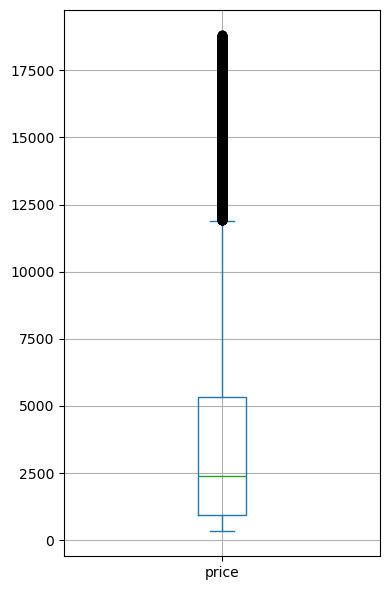

In [19]:
# Boxplot 

data_p = data['price']
ax = data_p.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

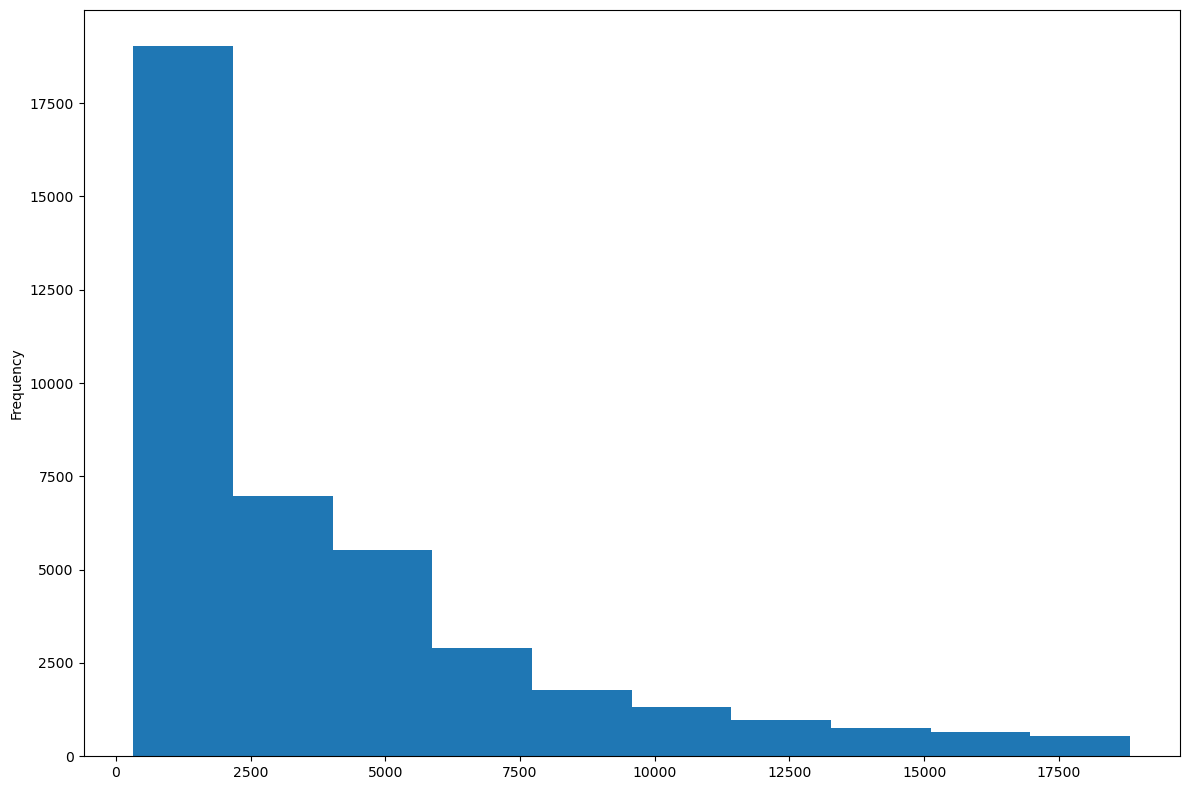

In [25]:
# Histogram
data_p = data['price']
ax = data_p.plot.hist(figsize=(12, 8))
plt.tight_layout()

In [ ]:
#tiene distribucion asimetrica, desviado a la izq

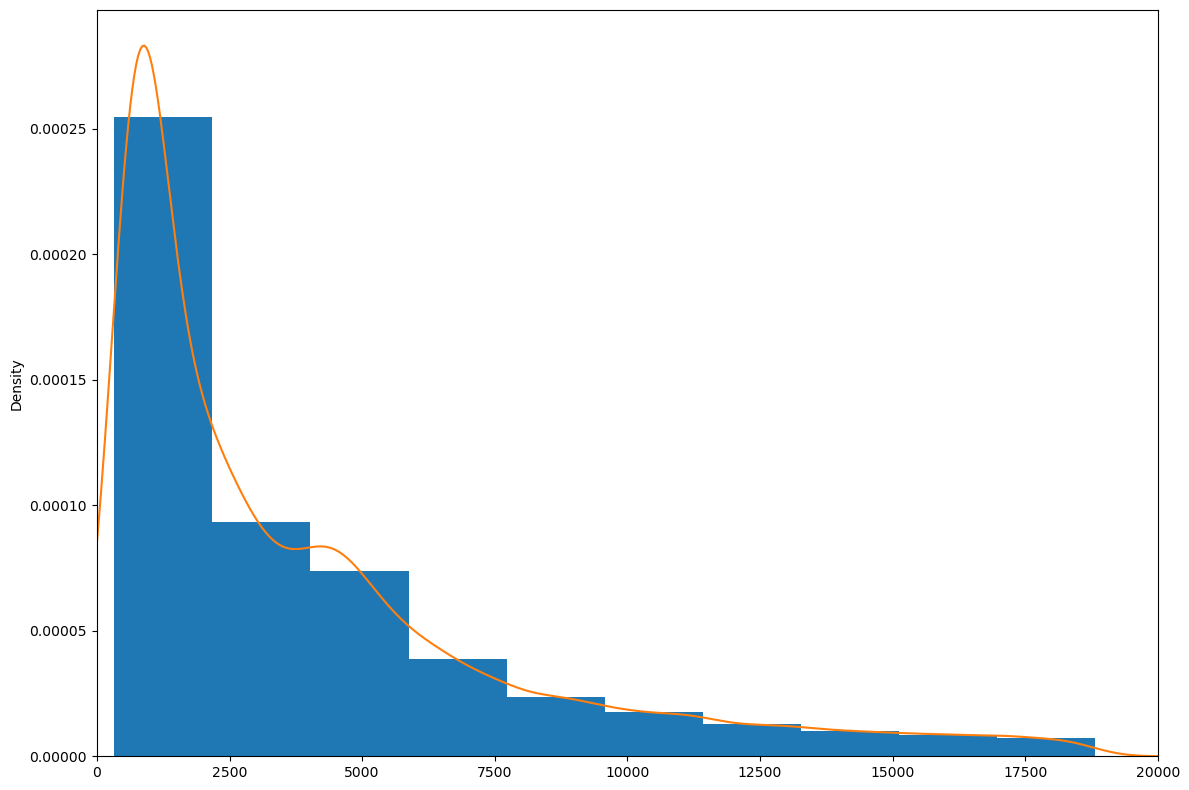

In [89]:
ax = data_p.plot.hist(density=True,
                    xlim=[0, 20000], 
                    figsize=(12, 8))
data_p.plot.density(ax=ax)
plt.tight_layout()

#### Variable carat

In [5]:
# Mean
mean_carat = data['carat'].mean()
print('Mean of carat:', mean_carat)

Mean of carat: 0.7977055988134963


In [6]:
# Trimmed mean 
tmean_carat = trim_mean(data['carat'], 0.1)
print('Trimmed mean of carat', tmean_carat)

Trimmed mean of carat 0.7341171018075081


In [7]:
# Median
median_carat = data['carat'].median()
print('Median of carat:', median_carat)

Median of carat: 0.7


In [12]:
#Desviation
dev_carat = data['carat'].mean() - data['carat']
dev_carat
print('Carat deviation', dev_carat.sum())

Carat deviation -5.6203930398623925e-12


In [13]:
#Mean absolute deviation
mean_dev_carat = abs(data['carat'].mean() - data['carat'])
mean_dev_carat
print('Carat desviation:', mean_dev_carat.sum() / len(mean_dev_carat))

Carat desviation: 0.385912540110232


In [14]:
#Variance 
var_carat = (data['carat'].mean() - data['carat'])**2
variance_carat = var_carat.sum() / (len(var_carat) - 1)
print('Variance of carat:', variance_carat)

Variance of carat: 0.22614230072877511


In [16]:
# Standard deviation
std_dev_carat = data['carat'].std()
print('Standard deviation carat:', std_dev_carat)

Standard deviation carat: 0.47554421532468527


In [17]:
#Min & Max
min_carat = data['carat'].min()
max_carat = data['carat'].max()
print('Max carat:', max_carat, '\nMin carat:', min_carat)

Max carat: 4.5 
Min carat: 0.2


In [20]:
# Range
carat_range = max_carat - min_carat
print('Carat range:', carat_range)

Carat range: 4.3


In [21]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['carat'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
carat,0.3,0.4,0.7,1.04,1.71


In [22]:
# Interquartile range
per_75 = 1.04
per_25 = 0.4
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 0.64


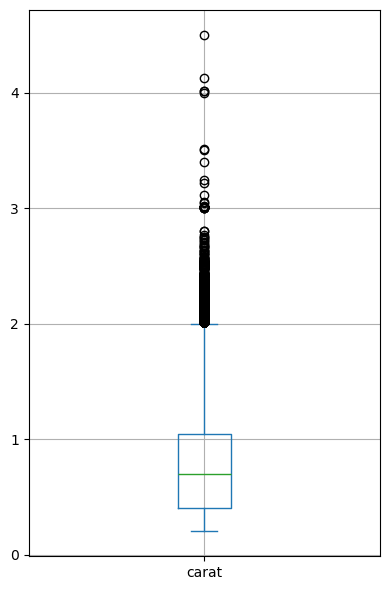

In [28]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data_carat = data['carat']
ax = data_carat.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

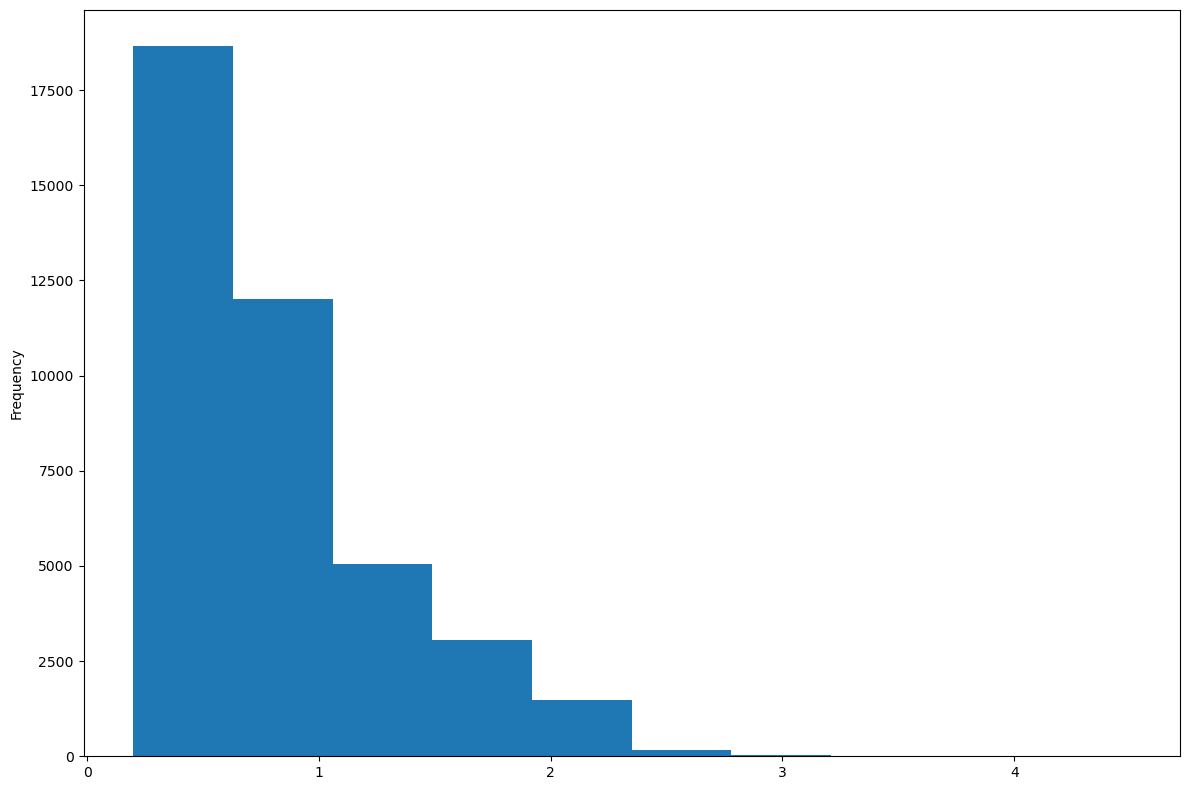

In [32]:
# Histogram
data_carat = data['carat']
ax = data_carat.plot.hist(figsize=(12, 8))
plt.tight_layout()

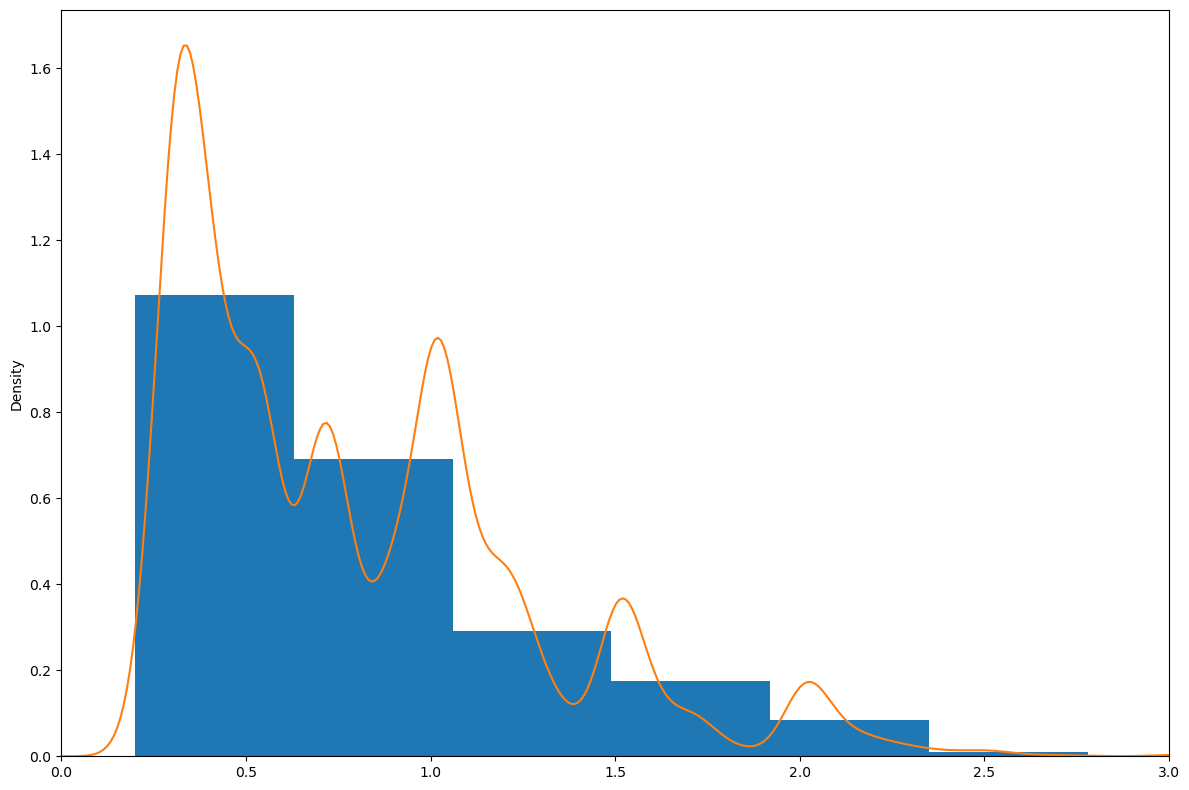

In [35]:
ax = data_carat.plot.hist(density=True,
                    xlim=[0, 3], 
                    figsize=(12, 8))
data_carat.plot.density(ax=ax)
plt.tight_layout()

#### Varibale depth

In [36]:
# Mean
mean_depth = data['depth'].mean()
print('Mean of depth:', mean_depth)

Mean of depth: 61.752841428748


In [37]:
# Trimmed mean 
tmean_depth = trim_mean(data['depth'], 0.1)
print('Trimmed mean of depth', tmean_depth)

Trimmed mean of depth 61.78612698903136


In [38]:
# Median
median_depth = data['depth'].median()
print('Median of depth:', median_depth)

Median of depth: 61.8


In [39]:
# Standard deviation
std_dev_depth = data['depth'].std()
print('Standard deviation depth:', std_dev_depth)

Standard deviation depth: 1.4317253979077107


In [41]:
#Min & Max
min_depth = data['depth'].min()
max_depth = data['depth'].max()
print('Max depth:', max_depth, '\nMin depth:', min_depth)

Max depth: 79.0 
Min depth: 43.0


In [42]:
# Range
depth_range = max_depth - min_depth
print('Depth range:', depth_range)

Depth range: 36.0


In [43]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['depth'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
depth,59.3,61.0,61.8,62.5,63.8


In [44]:
# Interquartile range
per_75 = 62.5
per_25 = 61.0
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 1.5


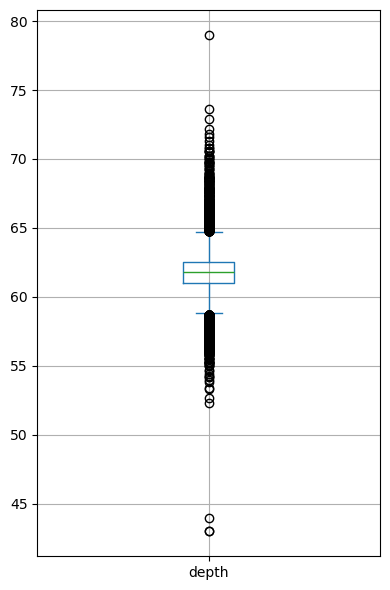

In [45]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data_depth = data['depth']
ax = data_depth.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

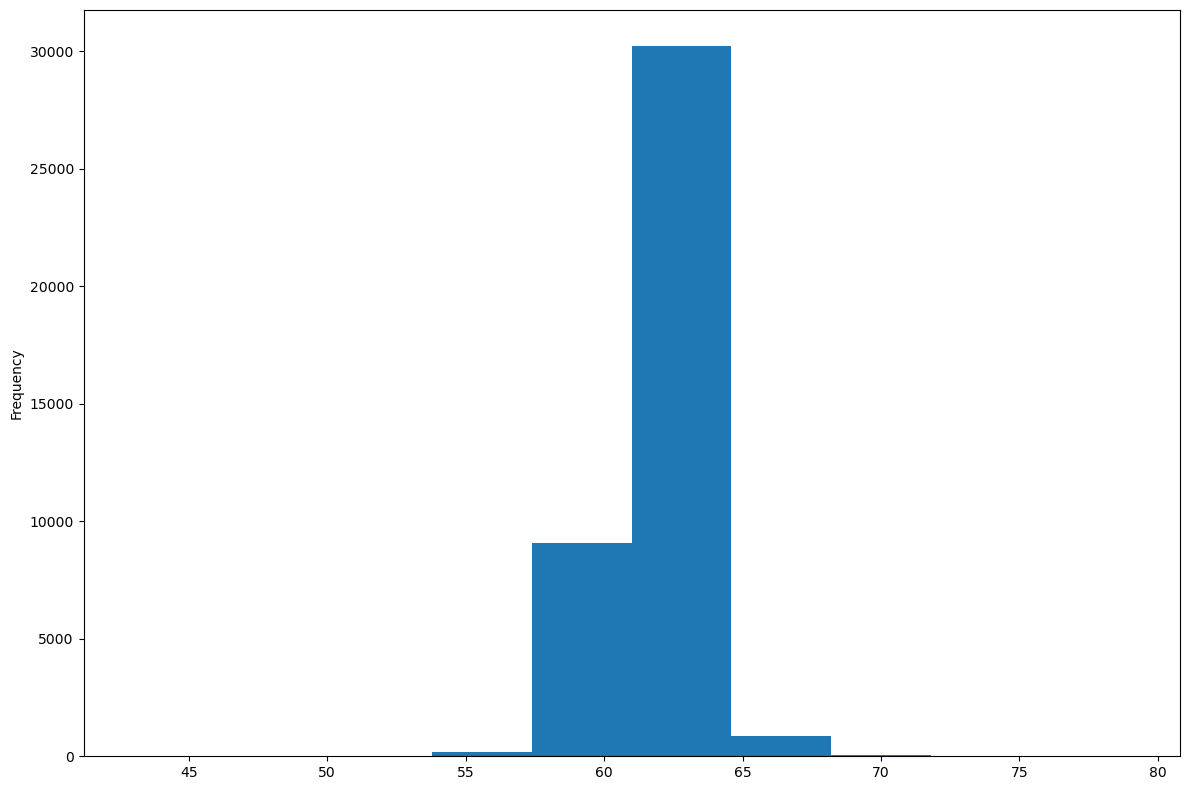

In [56]:
# Histogram
data_depth = data['depth']
ax = data_depth.plot.hist(figsize=(12, 8))
plt.tight_layout()

#### Variable table

In [57]:
# Mean
mean_table = data['table'].mean()
print('Mean of table:', mean_table)

Mean of table: 57.446132740081566


In [58]:
# Trimmed mean 
tmean_table = trim_mean(data['table'], 0.1)
print('Trimmed mean of table', tmean_table)

Trimmed mean of table 57.30735053298316


In [59]:
# Median
median_table = data['table'].median()
print('Median of table:', median_table)

Median of table: 57.0


In [60]:
# Standard deviation
std_dev_table = data['table'].std()
print('Standard deviation table:', std_dev_table)

Standard deviation table: 2.2335352685810945


In [61]:
#Min & Max
min_table = data['table'].min()
max_table = data['table'].max()
print('Max table:', max_table, '\nMin table:', min_table)

Max table: 95.0 
Min table: 43.0


In [62]:
# Range
table_range = max_table - min_table
print('Table range:', table_range)

Table range: 52.0


In [63]:
# Percentiles table 

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['table'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
table,54.0,56.0,57.0,59.0,61.0


In [65]:
# Interquartile range
per_75 = 59.0
per_25 = 56.0
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 3.0


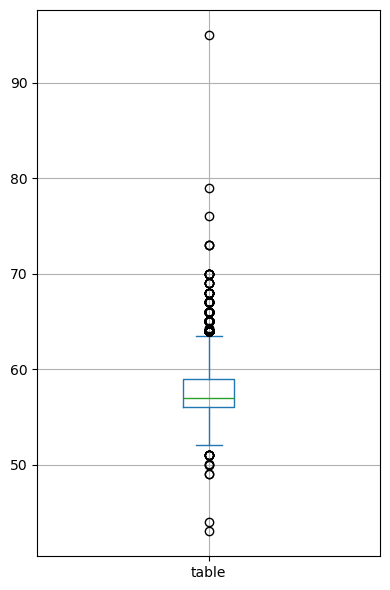

In [67]:
# Boxplot 

data_table = data['table']
ax = data_table.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

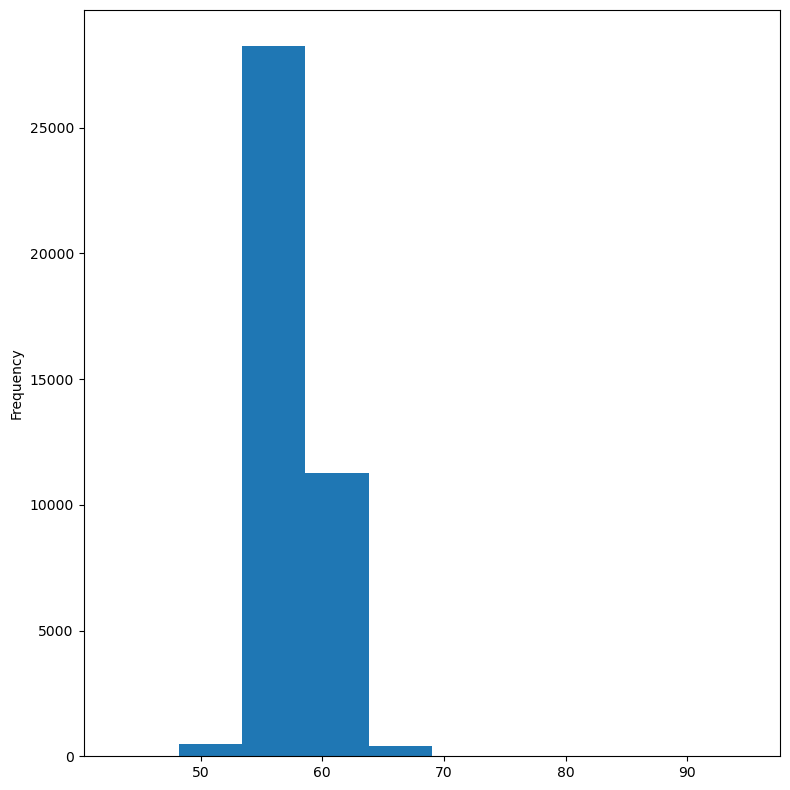

In [70]:
# Histogram
data_table = data['table']
ax = data_table.plot.hist(figsize=(8, 8))
plt.tight_layout()

#### Variable x

In [7]:
# Mean
mean_x = data['x'].mean()
print('Mean of x:', mean_x)

Mean of x: 5.729391669756519


In [8]:
# Trimmed mean 
tmean_x = trim_mean(data['x'], 0.1)
print('Trimmed mean of x', tmean_x)

Trimmed mean of x 5.656819712652558


In [9]:
# Median
median_x = data['x'].median()
print('Median of x:', median_x)

Median of x: 5.69


In [10]:
# Standard deviation
std_dev_x = data['x'].std()
print('Standard deviation x:', std_dev_x)

Standard deviation x: 1.124452692618594


In [11]:
#Min & Max
min_x = data['x'].min()
max_x = data['x'].max()
print('Max x:', max_x, '\nMin x:', min_x)

Max x: 10.23 
Min x: 0.0


In [12]:
# Range
x_range = max_x- min_x
print('x range:', x_range)

x range: 10.23


In [13]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['x'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
x,4.29,4.71,5.69,6.54,7.67


In [14]:
# Interquartile range
per_75 = 6.54
per_25 = 4.71
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 1.83


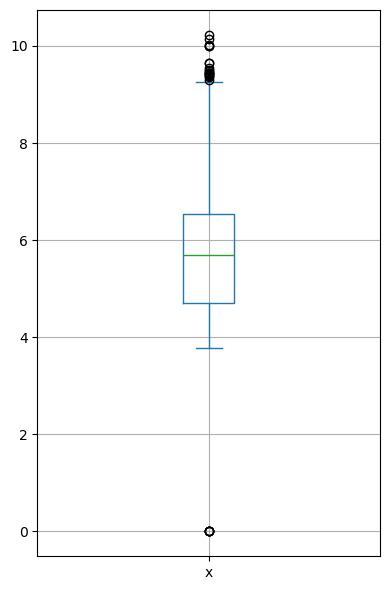

In [15]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data_x = data['x']
ax = data_x.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

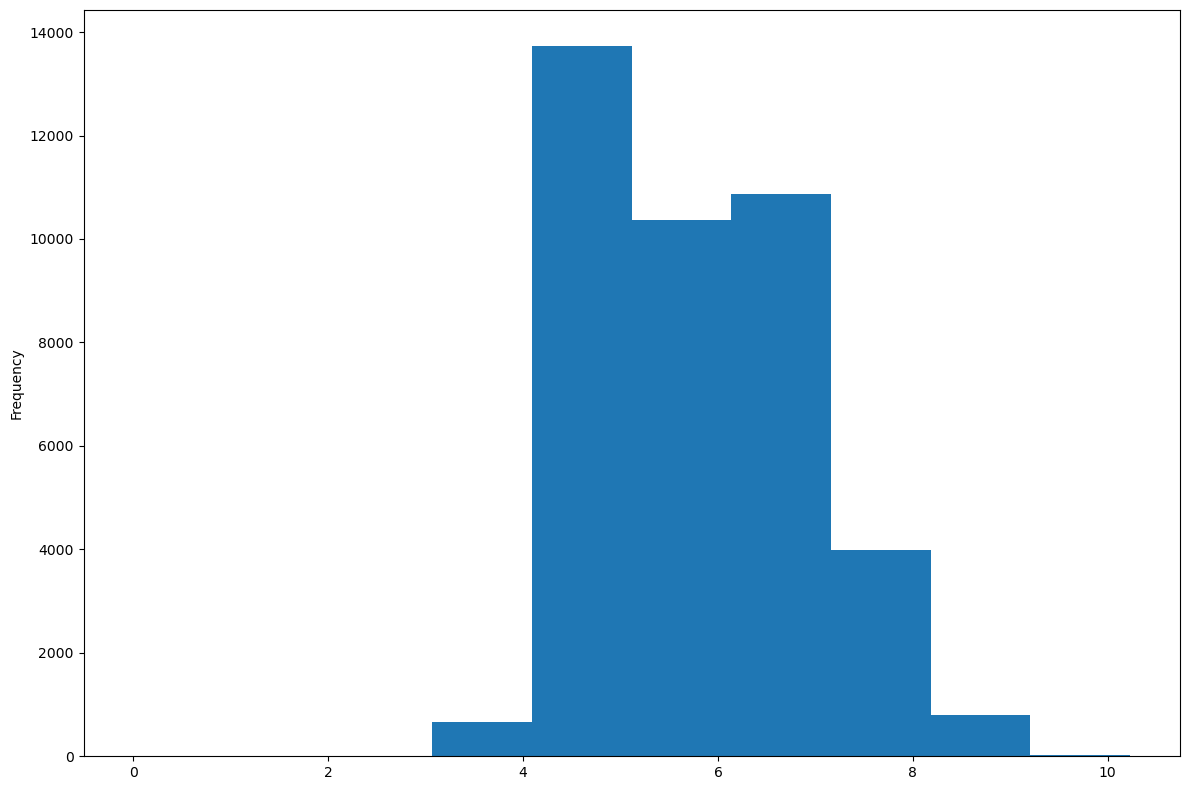

In [16]:
# Histogram
data_x = data['x']
ax = data_x.plot.hist(figsize=(12, 8))
plt.tight_layout()

#### Variable y

In [17]:
# Mean
mean_y = data['y'].mean()
print('Mean of y:', mean_y)

Mean of y: 5.732818687430478


In [18]:
# Trimmed mean 
tmean_y = trim_mean(data['y'], 0.1)
print('Trimmed mean of y', tmean_y)

Trimmed mean of y 5.659741078325351


In [19]:
# Median
median_y = data['y'].median()
print('Median of y:', median_y)

Median of y: 5.71


In [20]:
# Standard deviation
std_dev_y = data['y'].std()
print('Standard deviation y:', std_dev_y)

Standard deviation y: 1.146649896091256


In [21]:
#Min & Max
min_y = data['y'].min()
max_y = data['y'].max()
print('Max y:', max_y, '\nMin y:', min_y)

Max y: 58.9 
Min y: 0.0


In [22]:
# Range
y_range = max_y- min_y
print('y range:', y_range)

y range: 58.9


In [23]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['y'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
y,4.3,4.72,5.71,6.54,7.65


In [27]:
# Interquartile range
per_75 = 6.54
per_25 = 4.72
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 1.8200000000000003


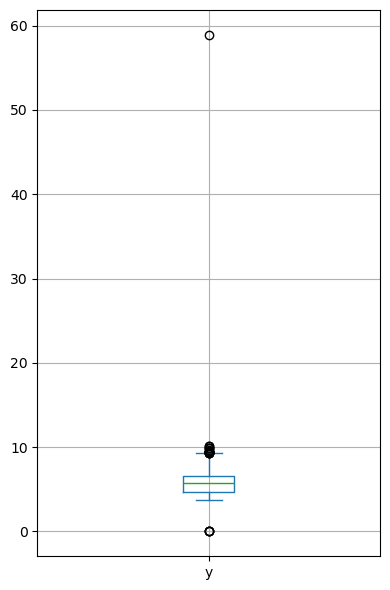

In [28]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data_y = data['y']
ax = data_y.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

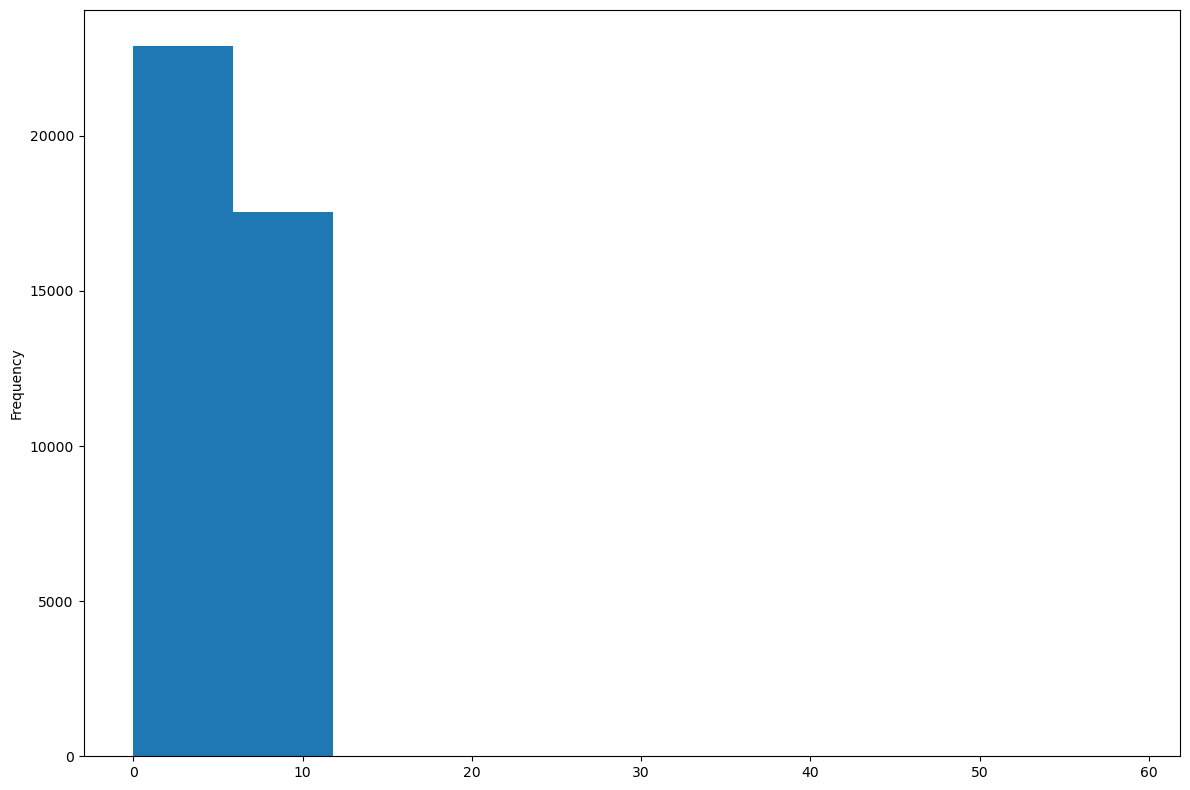

In [29]:
# Histogram
data_y = data['y']
ay = data_y.plot.hist(figsize=(12, 8))
plt.tight_layout()

#### Variable z

In [31]:
# Mean
mean_z = data['z'].mean()
print('Mean of z:', mean_z)

Mean of z: 3.5371536274873314


In [32]:
# Trimmed mean 
tmean_z = trim_mean(data['z'], 0.1)
print('Trimmed mean of z', tmean_z)

Trimmed mean of z 3.4931126216591997


In [33]:
# Median
median_z = data['z'].median()
print('Median of z:', median_z)

Median of z: 3.52


In [34]:
# Standard deviation
std_dev_z = data['z'].std()
print('Standard deviation z:', std_dev_z)

Standard deviation z: 0.6970615911262161


In [35]:
#Min & Max
min_z = data['z'].min()
max_z = data['z'].max()
print('Max z:', max_z, '\nMin z:', min_z)

Max z: 8.06 
Min z: 0.0


In [36]:
# Range
z_range = max_z- min_z
print('z range:', z_range)

z range: 8.06


In [37]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['z'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
z,2.65,2.91,3.52,4.035,4.74


In [38]:
# Interquartile range
per_75 = 4.035
per_25 = 2.91
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 1.125


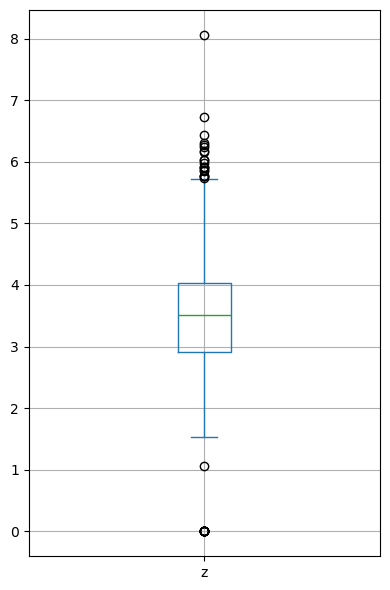

In [39]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data_x = data['z']
ax = data_x.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

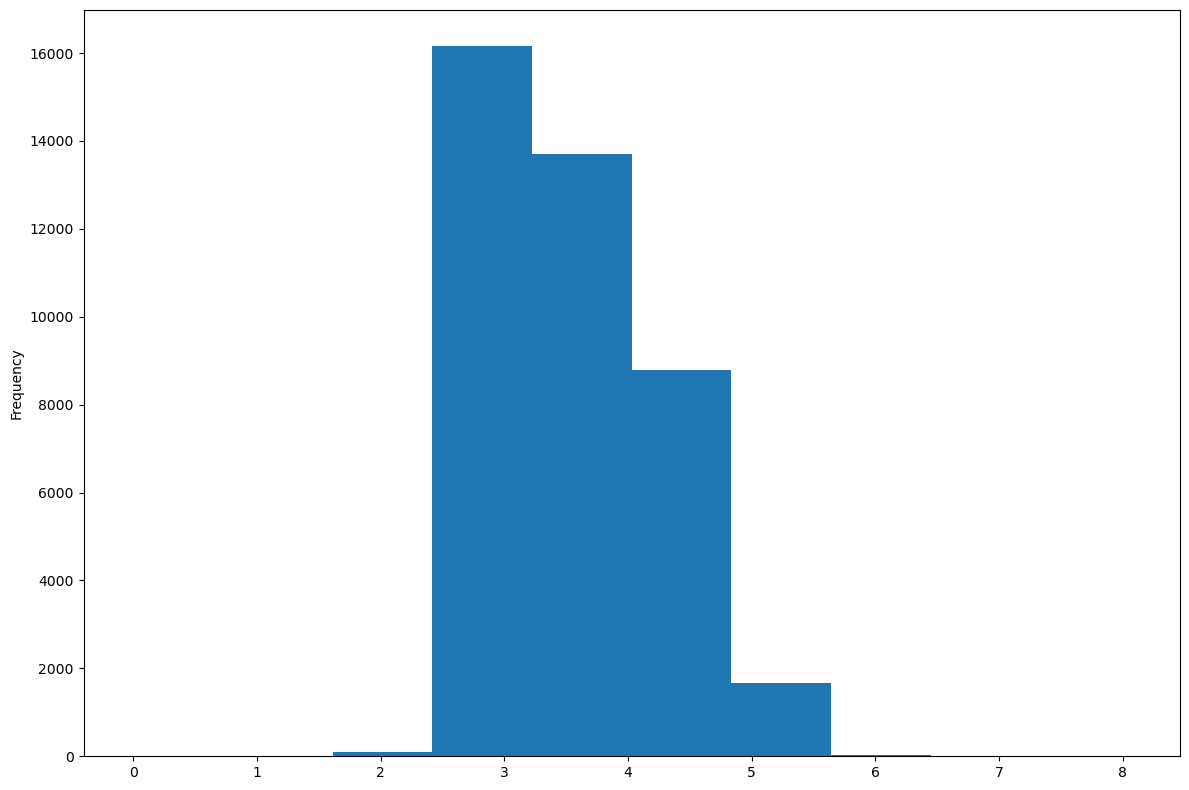

In [40]:
# Histogram
data_x = data['z']
ax = data_x.plot.hist(figsize=(12, 8))
plt.tight_layout()